In [1]:
# import necessary libraries

import os
import numpy as np
import pandas as pd

In [2]:
# get current working directory
os.getcwd()

'C:\\Users\\budha\\Desktop\\Learnings\\Tensorflow\\Coursera\\Module_1_Intro_Deep_Learning\\Week_3'

In [2]:
# set train and test diretory path

train_dir_path = './horse-or-human/train'
test_dir_path = './horse-or-human/validation'

train_horse_dir = train_dir_path + '/horses'
train_human_dir = train_dir_path + '/humans'

test_horse_dir = test_dir_path + '/horses'
test_human_dir = test_dir_path + '/humans'

In [6]:
# folders in the training folder

os.listdir(train_dir_path)

['horses', 'humans']

In [3]:
# getting the number of images in train for both horses and human

# on train and test 
print(len(os.listdir(train_dir_path + '/horses')))
print(len(os.listdir(train_dir_path + '/humans')))

500
527


In [4]:
# lets try to see some pictures in the train data
# import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as image

In [11]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [12]:
# # Set up matplotlib fig, and size it to fit 4x4 pics
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_horse_pix = [os.path.join(train_dir_path + '/horses', fname) 
#                 for fname in train_horse_names[pic_index-8:pic_index]]
# next_human_pix = [os.path.join(train_dir_path + '/humans', fname) 
#                 for fname in train_human_names[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_horse_pix+next_human_pix):
#     # Set up subplot; subplot indices start at 1
#     sp = plt.subplot(nrows, ncols, i + 1)
#     sp.axis('Off') # Don't show axes (or gridlines)

#     img = mpimg.imread(img_path)
#     plt.imshow(img)

# plt.show()

## create model from scratch

In [5]:
import tensorflow as tf
import tensorflow.keras as keras

In [13]:
# create and initialize model

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')    
])

In [14]:
# check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [15]:
# compile model

model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Preprocessing 
- Geting the data input ready using ImageDataGenerator

In [16]:
# scale the data while we import 

# create an instance of the Image Data Generator 
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [20]:
print(train_dir_path)
print(test_dir_path)

./horse-or-human/train
./horse-or-human/test


In [18]:
# instantiate data generator object
# to fetch from directory

# train image data generator
train_data_generator = generator.flow_from_directory(train_dir_path,
                                                           target_size=(300,300),
                                                           batch_size=128,
                                                           class_mode='binary')

Found 1027 images belonging to 2 classes.


In [22]:
# validation image data generator
validation_data_generator = generator.flow_from_directory(test_dir_path,
                                                           target_size=(300,300),
                                                           batch_size=32, # 32 since we have only 256 validation images
                                                           class_mode='binary')

Found 256 images belonging to 2 classes.


In [23]:
## fitting the model

model.fit(train_data_generator,epochs=12,
          steps_per_epoch=8,
          verbose=1,
          validation_data=validation_data_generator)

Epoch 1/12
8/8 [==============================] - 85s 10s/step - loss: 0.7909 - accuracy: 0.5795 - val_loss: 0.6546 - val_accuracy: 0.5000
Epoch 2/12
8/8 [==============================] - 52s 6s/step - loss: 0.7307 - accuracy: 0.5862 - val_loss: 0.5435 - val_accuracy: 0.8398
Epoch 3/12
8/8 [==============================] - 51s 6s/step - loss: 0.5548 - accuracy: 0.7731 - val_loss: 0.9764 - val_accuracy: 0.7266
Epoch 4/12
8/8 [==============================] - 51s 6s/step - loss: 0.5578 - accuracy: 0.8287 - val_loss: 0.5272 - val_accuracy: 0.7930
Epoch 5/12
8/8 [==============================] - 53s 7s/step - loss: 0.5970 - accuracy: 0.8398 - val_loss: 0.7824 - val_accuracy: 0.8008
Epoch 6/12
8/8 [==============================] - 52s 6s/step - loss: 0.1732 - accuracy: 0.9333 - val_loss: 1.2740 - val_accuracy: 0.7969
Epoch 7/12
8/8 [==============================] - 51s 6s/step - loss: 0.1074 - accuracy: 0.9577 - val_loss: 1.1000 - val_accuracy: 0.8242
Epoch 8/12
8/8 [=================

In [26]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

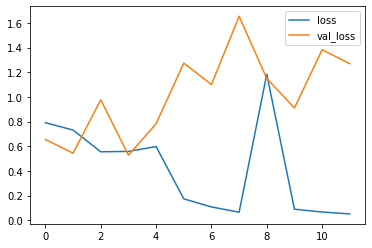

In [27]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

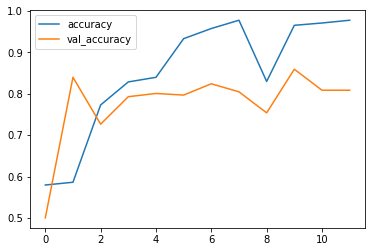

In [28]:
metrics[['accuracy', 'val_accuracy']].plot()

## predict using new image

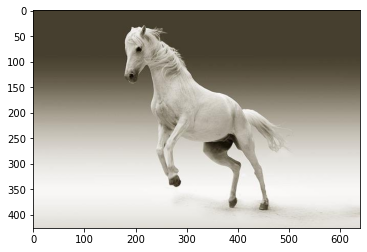

In [29]:
# check new image
test_image = plt.imread('horse_1.jpg')
plt.imshow(test_image)

In [30]:
# load image to test using keras.utils.load_img
# update the size of the image to the size that the model can accept i.e. 300 x 300

img = keras.utils.load_img('human_1.jpg', target_size=(300, 300))

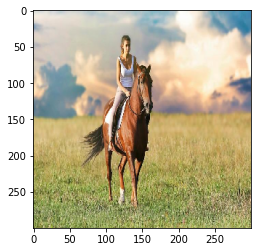

In [31]:
# check the image

plt.imshow(img)

In [32]:
# re-scale reshape the image  so that we can pass into the model
# use keras img_to_array to convert to array
x = keras.utils.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
x.shape

(1, 300, 300, 3)

In [33]:
images = np.vstack([x])
images
classes = model.predict(images, batch_size=10)

1/1 [==============================] - 0s 460ms/step


In [34]:
classes

array([[0.999998]], dtype=float32)

In [35]:
if classes[0][0] > 0.5:
    print('It is a horse')
else:
    print('It is a human')

It is a horse


In [81]:
os.path

<module 'ntpath' from 'C:\\Users\\budha\\AppData\\Local\\Programs\\Python\\Python39\\lib\\ntpath.py'>

In [89]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
visualization_model

### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [104]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = load_img('human_2.jpg', target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

1/1 [==============================] - 0s 193ms/step


In [99]:
successive_feature_maps

[array([[[[0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          ...,
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319]],
 
         [[0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
           0.        , 0.01099319],
          ...,
          [0.22440456, 0.        , 0.13845673, ..., 0.        ,
   

C:\Users\budha\AppData\Local\Temp\ipykernel_6976\533525661.py:19: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


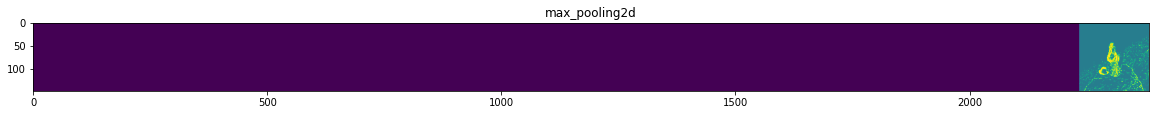

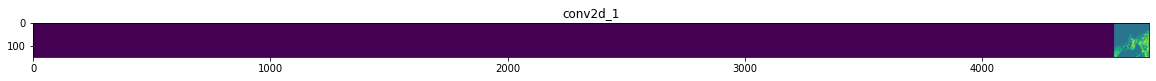

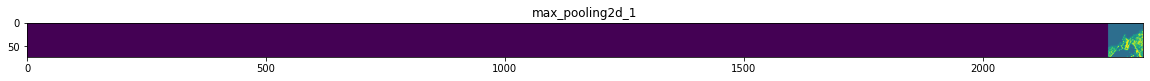

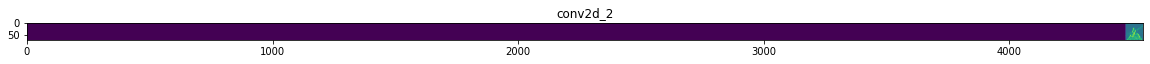

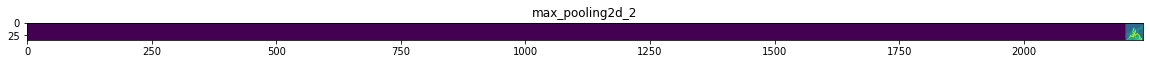

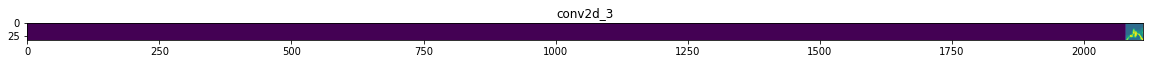

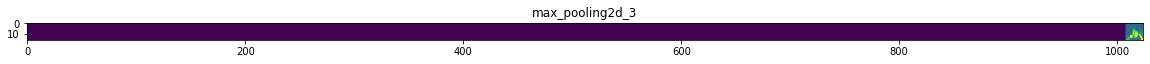

In [105]:
# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [92]:
train_horse_dir = os.listdir('./horse-or-human/train/horses')
train_human_dir = os.listdir('./horse-or-human/train/humans')

In [97]:
os.path.join()

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# from original file
# Prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
#img_path = random.choice(horse_img_files + human_img_files)

img_path = random.choice(train_horse_dir + test_dir_path)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Condensing the Data
- Here we will try to use 150 x 150 instead of our earlier 300 x 300 size image

In [6]:
# create and initialize model

model = keras.models.Sequential([
    # input_shape updated to 150 x 150
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    # removing these conv and max pooling layer as we have reduced the image size
    # rest everything remains the same
    
#     keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#     keras.layers.MaxPool2D(pool_size =  (2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')    
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [7]:
# compile model
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [8]:
## setting up the ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

In [9]:
# instantiate generator object
generator = ImageDataGenerator(rescale=1/255.0)

In [10]:
train_dir_path

'./horse-or-human/train'

In [12]:
# set up train and test image generator objects

train_generator = generator.flow_from_directory(train_dir_path,
                                                target_size=(150,150),
                                                batch_size=128,
                                                class_mode='binary')

Found 1027 images belonging to 2 classes.


In [13]:
# set up train and test image generator objects

test_generator = generator.flow_from_directory(test_dir_path,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='binary')

Found 256 images belonging to 2 classes.


In [14]:
# fit them model

model.fit(train_generator,
          epochs=12,
          validation_data=test_generator,
          verbose=1)

Epoch 1/12
9/9 [==============================] - 20s 2s/step - loss: 1.2698 - accuracy: 0.5083 - val_loss: 0.6466 - val_accuracy: 0.5391
Epoch 2/12
9/9 [==============================] - 18s 2s/step - loss: 0.5613 - accuracy: 0.7283 - val_loss: 0.4899 - val_accuracy: 0.8047
Epoch 3/12
9/9 [==============================] - 17s 2s/step - loss: 0.2981 - accuracy: 0.8939 - val_loss: 2.9803 - val_accuracy: 0.5312
Epoch 4/12
9/9 [==============================] - 20s 2s/step - loss: 0.3173 - accuracy: 0.8890 - val_loss: 1.0177 - val_accuracy: 0.8281
Epoch 5/12
9/9 [==============================] - 18s 2s/step - loss: 0.1035 - accuracy: 0.9698 - val_loss: 1.4286 - val_accuracy: 0.7734
Epoch 6/12
9/9 [==============================] - 20s 2s/step - loss: 0.0844 - accuracy: 0.9659 - val_loss: 2.4014 - val_accuracy: 0.6875
Epoch 7/12
9/9 [==============================] - 19s 2s/step - loss: 0.1239 - accuracy: 0.9523 - val_loss: 1.1182 - val_accuracy: 0.8516
Epoch 8/12
9/9 [==================

## Predict using new image

In [15]:
from keras.utils import load_img, img_to_array

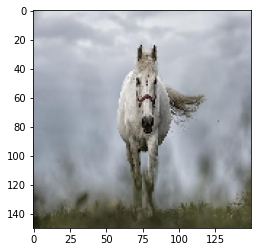

In [43]:
# load image data

img = load_img('horse_2.jpg', target_size=(150, 150))
plt.imshow(img)

In [48]:
x = img_to_array(img)
# x.shape = (150, 150, 3)

# reshape to fit to model

x = x.reshape((1,) + x.shape)
x.shape

pred = model.predict(x, batch_size=10)
print('Prediction Value: {}'.format(pred))

if pred[0][0] > 0.5:
    print('This is a Horse')
else:
    print('This is a Human')

1/1 [==============================] - 0s 62ms/step
Prediction Value: [[1.]]
This is a Horse
